### Import libraries

In [1]:
import os
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import batch_creator, loader
from helpers import helpers, plotter, metrics
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
print('How many observations? (deafult 150000)')
dataset_size = input()
print('Do you want to overwrite data? True/False')
rewrite = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = os.path.expanduser('~/Downloads/GPT_' + kernel)

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
rbf_const_2D
How many observations? (deafult 150000)
2
Do you want to overwrite data? True/False
False


In [3]:
data = loader.load_data(kernel, size = dataset_size, rewrite = rewrite.capitalize(), diff_x= True, noise = False, d = d, ordered = True)

['em_te_2.npy', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy', 'em_tr_2.npy']


In [4]:
a = data[-4][1, :10].reshape(1, -1)

In [5]:
b = data[1][1, :10].reshape(1, -1)

In [6]:
c = data[-3][1, :10].reshape(1, -1)

In [7]:
dd = data[-1][1, :10].reshape(1, -1)

In [8]:
a

array([[264., 244., 340., 289., 314., 265., 254., 249., 285., 242.]])

In [9]:
b

array([[ 7.30813801,  5.38459099, 14.91017682,  9.8774689 , 12.35579582,
         7.4977443 ,  6.36305617,  5.85732549,  9.41111518,  5.15314729]])

In [10]:
c

array([[ 1.42948886,  3.97891532,  3.30185699, -0.46714584, -2.88594971,
        -3.64957459,  3.47368   , -0.58534392, -1.17222729, -0.57185026]])

In [11]:
dd

array([[0., 0., 0., 1., 1., 1., 0., 1., 1., 1.]])

In [12]:
batch_creator.create_batch_2d(a, b, c, dd, batch_s=1, context_p=2)

p:  0.49641991817168185


([array([[-0.57185026,  3.97891532, -0.58534392,  3.47368   , -3.64957459,
          -1.17222729, -0.46714584, -2.88594971,  1.42948886,  3.30185699]]),
  array([[ 5.15314729,  5.38459099,  5.85732549,  6.36305617,  7.4977443 ,
           9.41111518,  9.8774689 , 12.35579582,  7.30813801, 14.91017682]]),
  array([[242., 244., 249., 254., 265., 285., 289., 314., 264., 340.]]),
  array([[1., 0., 1., 0., 1., 1., 1., 1., 0., 0.]])],
 [8])

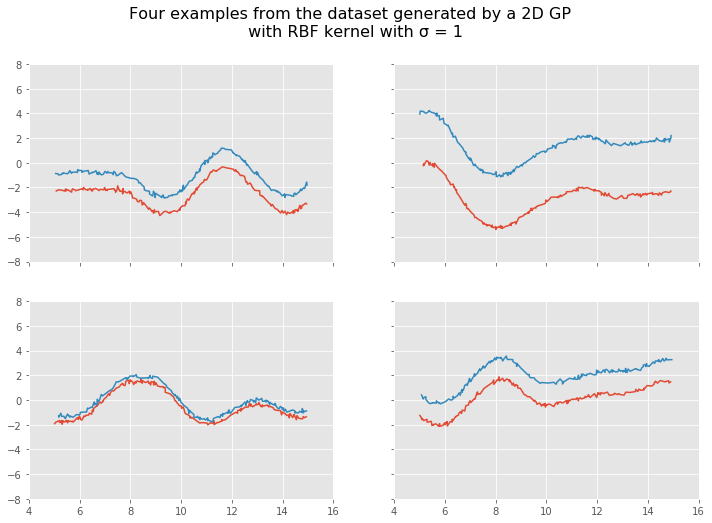

In [13]:
if d:
    plotter.plot_2d_examples(data[2], data[-2], data[0])
else:
    plotter.plot_examples(data[0], data[4])

In [14]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [15]:
# batch_x_tr, batch_tar_tr, _ = batch_creator.fake_batch(pad_x_tr, pad_y_fren_tr, batch_s=1)

New folder /Users/omernivron/Downloads/GPT_rbf_const_2D/ckpt/check_run_9999
Initializing from scratch.


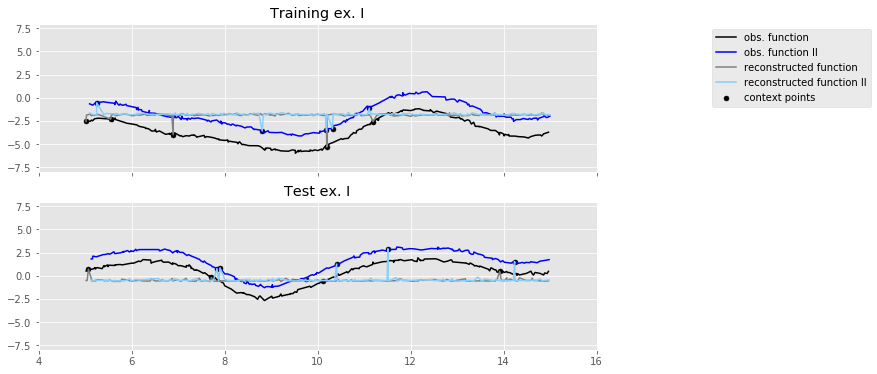

Epoch 0 batch 0 train Loss 44.7379 test Loss 5.0772 with training MSE metric 5.3902 and testing MSE metric 5.3443
learning rate is 0.0003000000142492354
r squared training, series 0: -3.618083534339213, series 1: -2.881498357431896
r squared testing, series 0: -3.8282916510791045, series 1: -1.6793401669275176


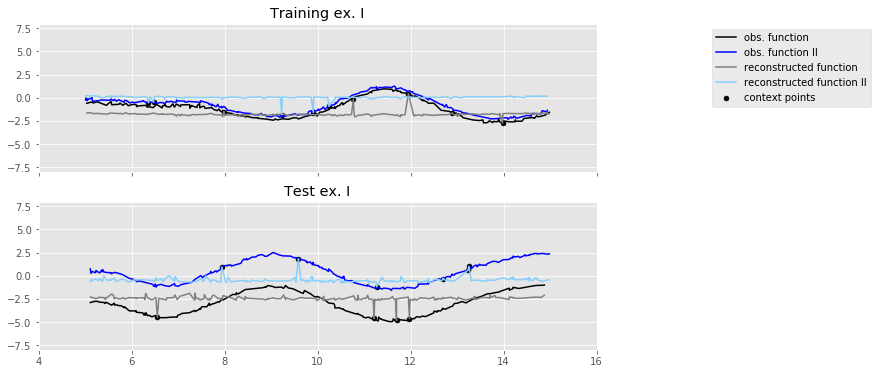

Epoch 0 batch 300 train Loss 0.6276 test Loss 0.6714 with training MSE metric 2.2585 and testing MSE metric 2.6842
learning rate is 0.0003000000142492354
r squared training, series 0: -0.7356029969356475, series 1: -0.6364238344374467
r squared testing, series 0: -1.1714080070111859, series 1: -1.1776492554930371


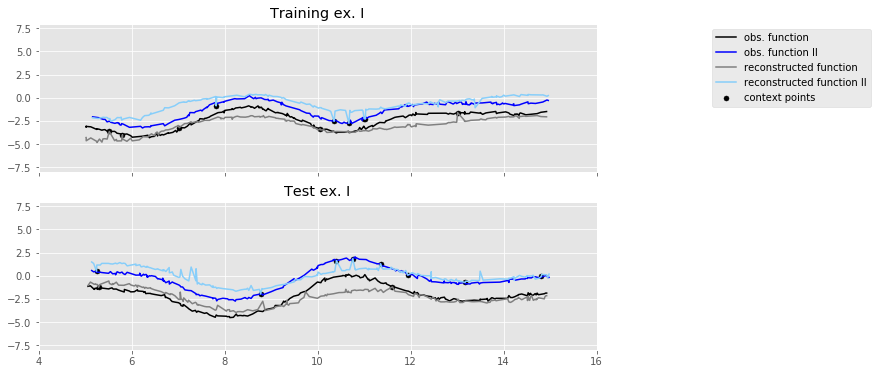

Epoch 0 batch 600 train Loss 0.4740 test Loss 0.4763 with training MSE metric 1.2075 and testing MSE metric 1.2149
learning rate is 0.0003000000142492354
r squared training, series 0: 0.0996696139664538, series 1: 0.10562624561176279
r squared testing, series 0: 0.08916586162791275, series 1: 0.11504025762046724


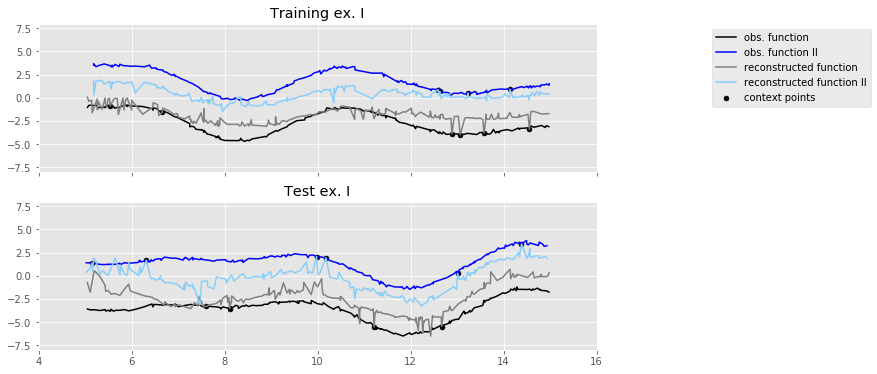

Epoch 0 batch 900 train Loss 0.4714 test Loss 0.4710 with training MSE metric 1.2181 and testing MSE metric 1.2270
learning rate is 0.0003000000142492354
r squared training, series 0: 0.027447644654374784, series 1: 0.08091266503448036
r squared testing, series 0: 0.09462150058154047, series 1: 0.053975382652213556


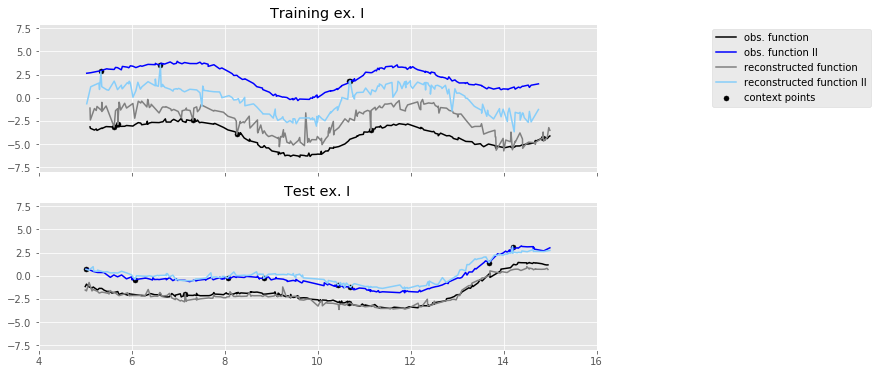

Epoch 0 batch 1200 train Loss 0.4244 test Loss 0.3885 with training MSE metric 1.0076 and testing MSE metric 0.8791
learning rate is 0.0003000000142492354
r squared training, series 0: 0.260538916453301, series 1: 0.2313874965668355
r squared testing, series 0: 0.313301592866598, series 1: 0.2972052517976693


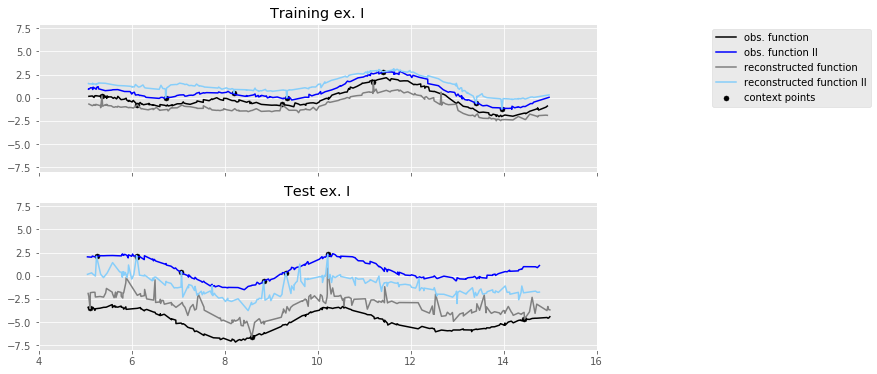

Epoch 0 batch 1500 train Loss 0.3685 test Loss 0.4073 with training MSE metric 0.8426 and testing MSE metric 0.9034
learning rate is 0.0003000000142492354
r squared training, series 0: 0.3265126600072507, series 1: 0.31380415625758135
r squared testing, series 0: 0.3421125443879594, series 1: 0.30552827013112793


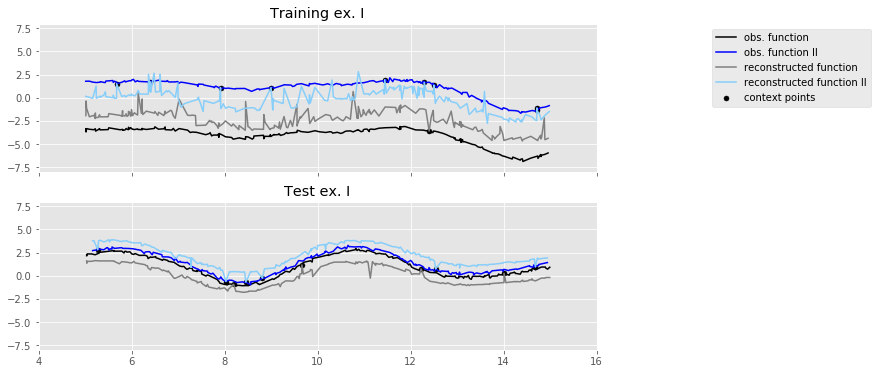

Epoch 0 batch 1800 train Loss 0.4421 test Loss 0.5331 with training MSE metric 0.9827 and testing MSE metric 1.3510
learning rate is 0.0003000000142492354
r squared training, series 0: 0.25329087510304027, series 1: 0.2471239556583617
r squared testing, series 0: 0.021254932607362692, series 1: -0.06855089418590143
Time taken for 1 epoch: 6220.734838008881 secs



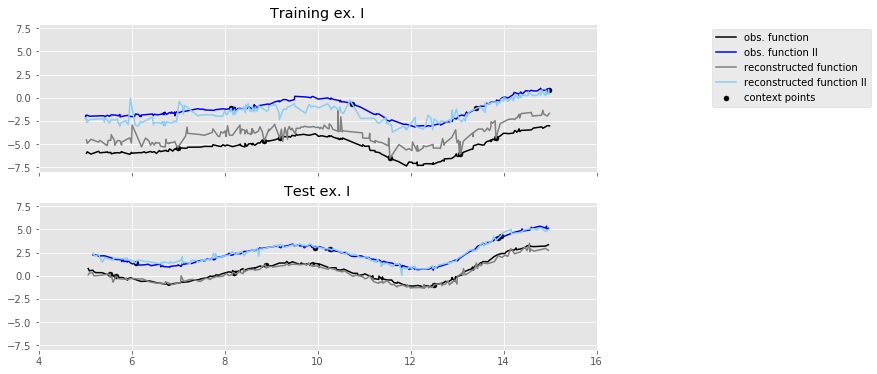

Epoch 1 batch 0 train Loss 0.4162 test Loss 0.4346 with training MSE metric 1.0210 and testing MSE metric 1.0229
learning rate is 0.0003000000142492354
r squared training, series 0: 0.2541218517089817, series 1: 0.1641028615049748
r squared testing, series 0: 0.2464745255223672, series 1: 0.26601113887234556


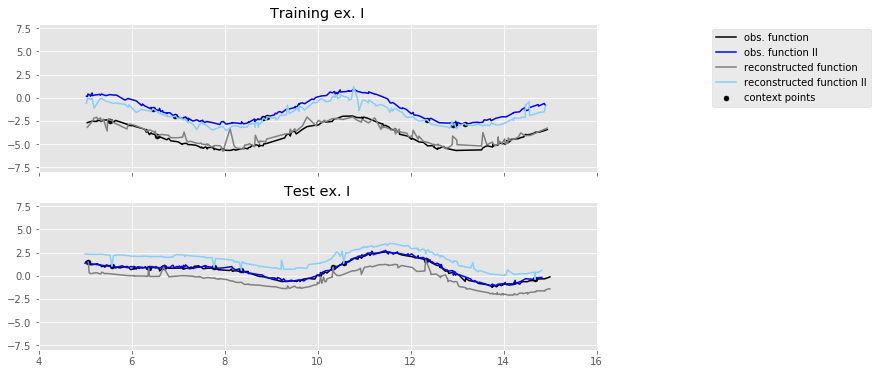

Epoch 1 batch 300 train Loss 0.3943 test Loss 0.4475 with training MSE metric 0.9324 and testing MSE metric 1.1493
learning rate is 0.0003000000142492354
r squared training, series 0: 0.2787093892806326, series 1: 0.27391287580653656
r squared testing, series 0: 0.1506659575806791, series 1: 0.1065222615328904


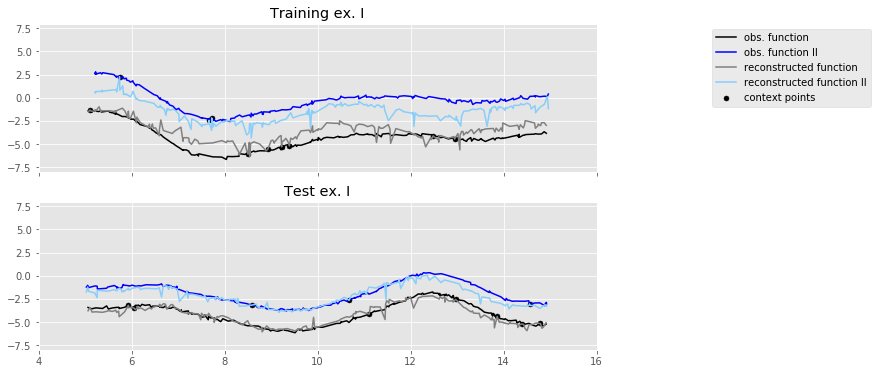

Epoch 1 batch 600 train Loss 0.3702 test Loss 0.4016 with training MSE metric 0.8825 and testing MSE metric 1.0596
learning rate is 0.0003000000142492354
r squared training, series 0: 0.3332609161129487, series 1: 0.33980110786698814
r squared testing, series 0: 0.0728829929169276, series 1: 0.2157837811586013


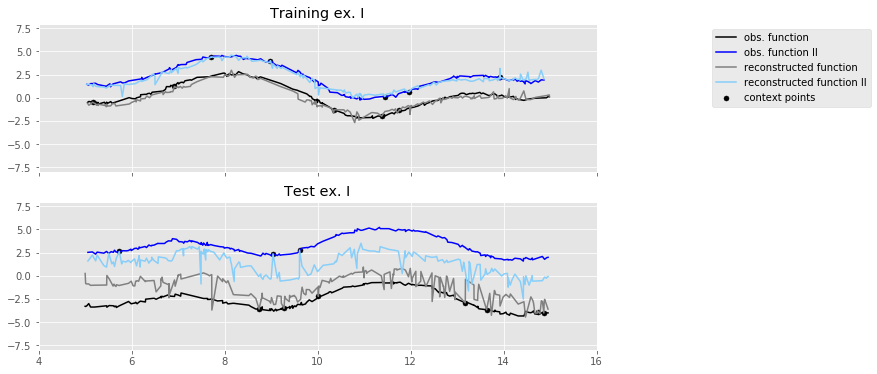

Epoch 1 batch 900 train Loss 0.3859 test Loss 0.4781 with training MSE metric 0.8998 and testing MSE metric 1.2011
learning rate is 0.0003000000142492354
r squared training, series 0: 0.27262171151360687, series 1: 0.3192100452513873
r squared testing, series 0: -0.08305121777499608, series 1: 0.047044983206385754


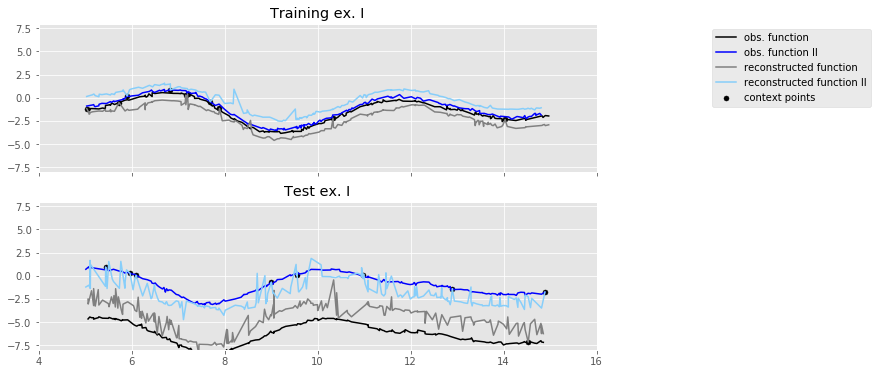

Epoch 1 batch 1200 train Loss 0.3099 test Loss 0.3185 with training MSE metric 0.6561 and testing MSE metric 0.7175
learning rate is 0.0003000000142492354
r squared training, series 0: 0.4923295728382388, series 1: 0.5538992531286508
r squared testing, series 0: 0.46777594805536526, series 1: 0.4952477906575677


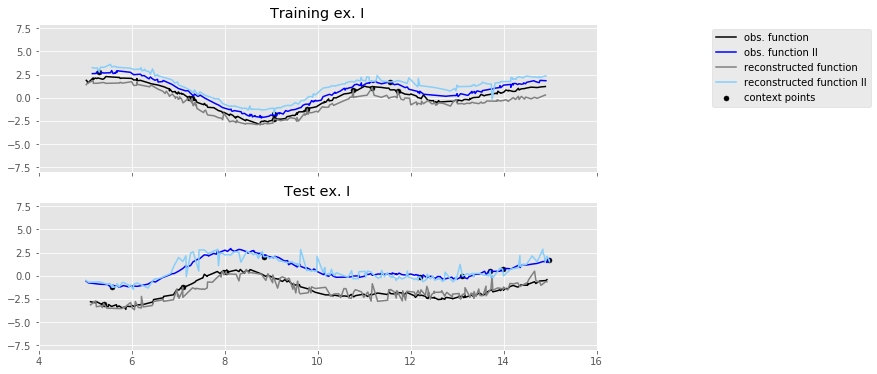

Epoch 1 batch 1500 train Loss 0.2852 test Loss 0.3214 with training MSE metric 0.6291 and testing MSE metric 0.8184
learning rate is 0.0003000000142492354
r squared training, series 0: 0.497966867572457, series 1: 0.5329339260564536
r squared testing, series 0: 0.34098196918725326, series 1: 0.3927930836942223


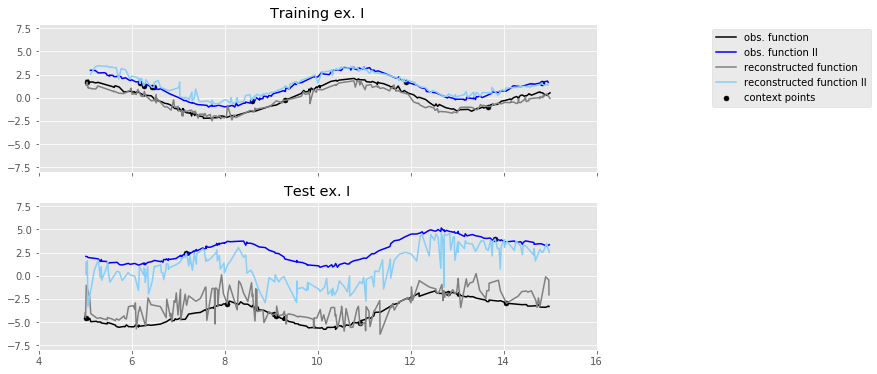

Epoch 1 batch 1800 train Loss 0.2344 test Loss 0.3163 with training MSE metric 0.5051 and testing MSE metric 0.7483
learning rate is 0.0003000000142492354
r squared training, series 0: 0.6265492345103743, series 1: 0.6086949738024625
r squared testing, series 0: 0.38742773277885617, series 1: 0.38508355121750837
Time taken for 1 epoch: 6425.236184120178 secs



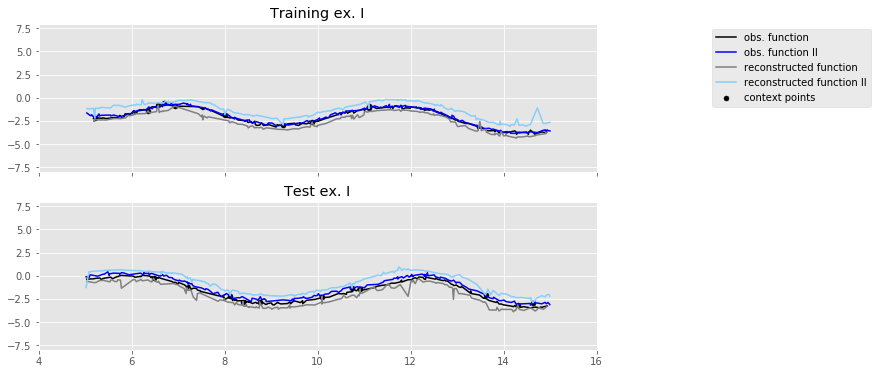

Epoch 2 batch 0 train Loss 0.2802 test Loss 0.2433 with training MSE metric 0.6437 and testing MSE metric 0.5290
learning rate is 0.0003000000142492354
r squared training, series 0: 0.4580765099740937, series 1: 0.518206111932277
r squared testing, series 0: 0.6236568503097327, series 1: 0.615373084940245


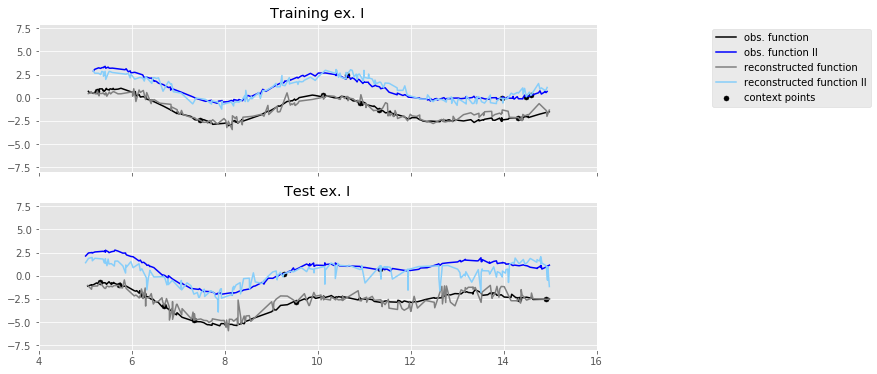

Epoch 2 batch 300 train Loss 0.2173 test Loss 0.1728 with training MSE metric 0.4947 and testing MSE metric 0.3882
learning rate is 0.0003000000142492354
r squared training, series 0: 0.6211123388672828, series 1: 0.6150205254484025
r squared testing, series 0: 0.7400863820631465, series 1: 0.7391580003607654


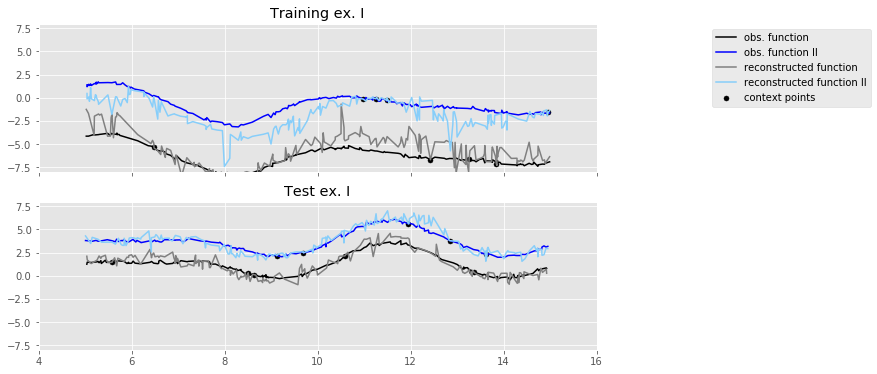

Epoch 2 batch 600 train Loss 0.2459 test Loss 0.1770 with training MSE metric 0.5524 and testing MSE metric 0.4115
learning rate is 0.0003000000142492354
r squared training, series 0: 0.5579572353518214, series 1: 0.5796342353434624
r squared testing, series 0: 0.7051630044600773, series 1: 0.6817297408672915


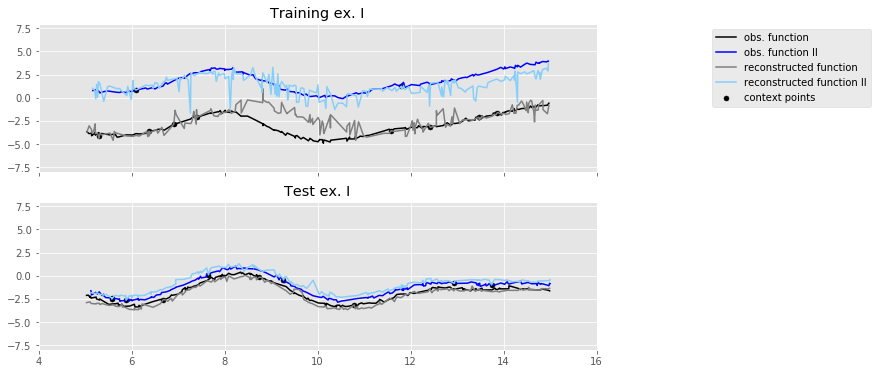

Epoch 2 batch 900 train Loss 0.1736 test Loss 0.1866 with training MSE metric 0.3985 and testing MSE metric 0.4650
learning rate is 0.0003000000142492354
r squared training, series 0: 0.6840418114733025, series 1: 0.7065015524027982
r squared testing, series 0: 0.6415447878807419, series 1: 0.6714587707583781


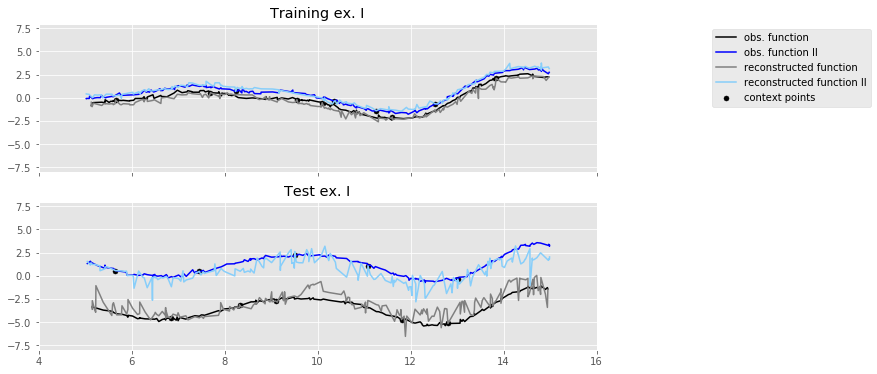

Epoch 2 batch 1200 train Loss 0.1308 test Loss 0.1971 with training MSE metric 0.3647 and testing MSE metric 0.4836
learning rate is 0.0003000000142492354
r squared training, series 0: 0.7095990269600903, series 1: 0.743893723663234
r squared testing, series 0: 0.6062351497374224, series 1: 0.606375170299343


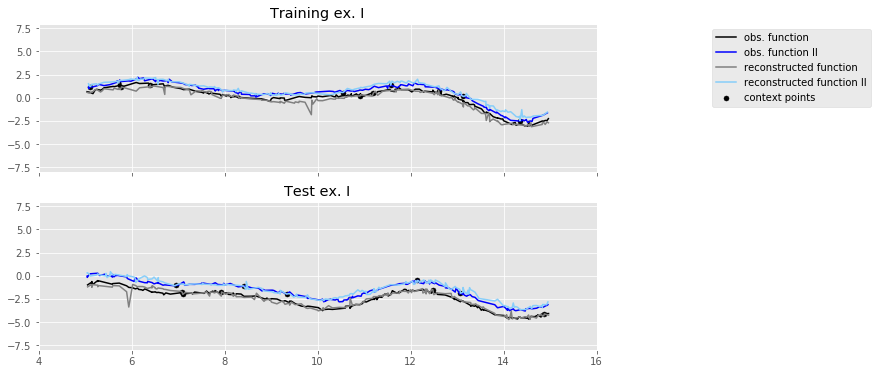

Epoch 2 batch 1500 train Loss 0.1422 test Loss 0.1558 with training MSE metric 0.3771 and testing MSE metric 0.3986
learning rate is 0.0003000000142492354
r squared training, series 0: 0.7025761442240324, series 1: 0.6925499986148711
r squared testing, series 0: 0.7149348523493608, series 1: 0.6899578667808697


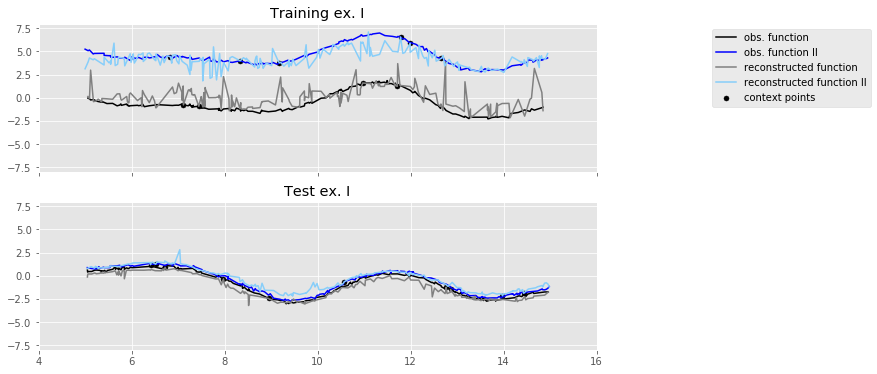

Epoch 2 batch 1800 train Loss 0.0684 test Loss 0.1031 with training MSE metric 0.2851 and testing MSE metric 0.3224
learning rate is 0.0003000000142492354
r squared training, series 0: 0.787309164549995, series 1: 0.7765999219196797
r squared testing, series 0: 0.7713367408752769, series 1: 0.7613321132627963
Time taken for 1 epoch: 6017.765851020813 secs



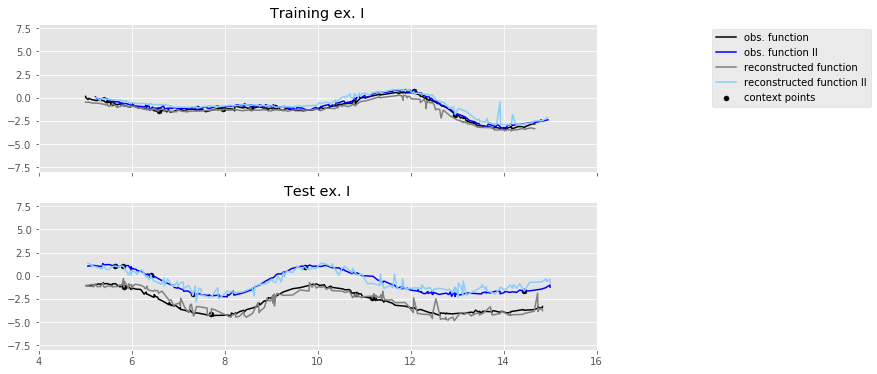

Epoch 3 batch 0 train Loss 0.1097 test Loss 0.0471 with training MSE metric 0.3297 and testing MSE metric 0.2429
learning rate is 0.0003000000142492354
r squared training, series 0: 0.7378318072000448, series 1: 0.7836544595323394
r squared testing, series 0: 0.8277944820375311, series 1: 0.8167615723561422


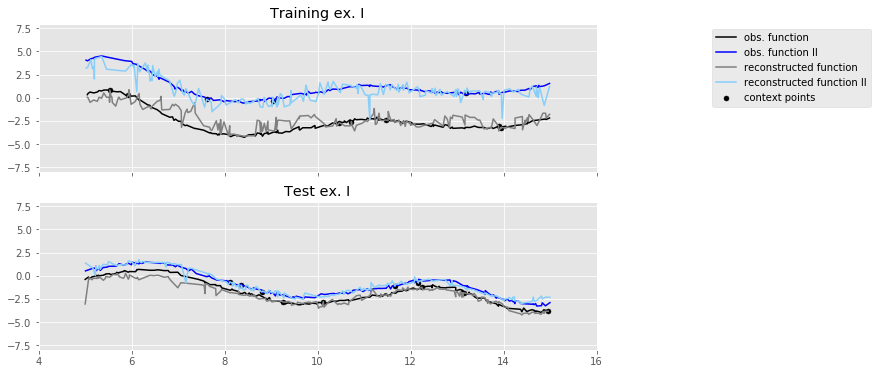

Epoch 3 batch 300 train Loss 0.1317 test Loss 0.0941 with training MSE metric 0.4029 and testing MSE metric 0.3196
learning rate is 0.0003000000142492354
r squared training, series 0: 0.6677284417844827, series 1: 0.6971651871369764
r squared testing, series 0: 0.7680606986940244, series 1: 0.7423559264375954


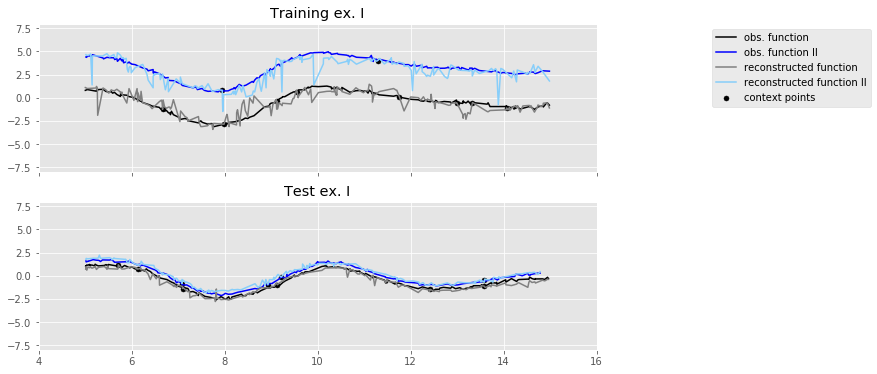

Epoch 3 batch 600 train Loss 0.0445 test Loss 0.0669 with training MSE metric 0.2569 and testing MSE metric 0.2833
learning rate is 0.0003000000142492354
r squared training, series 0: 0.8069387326274734, series 1: 0.8132387370563428
r squared testing, series 0: 0.7847084054578708, series 1: 0.7889332017969369


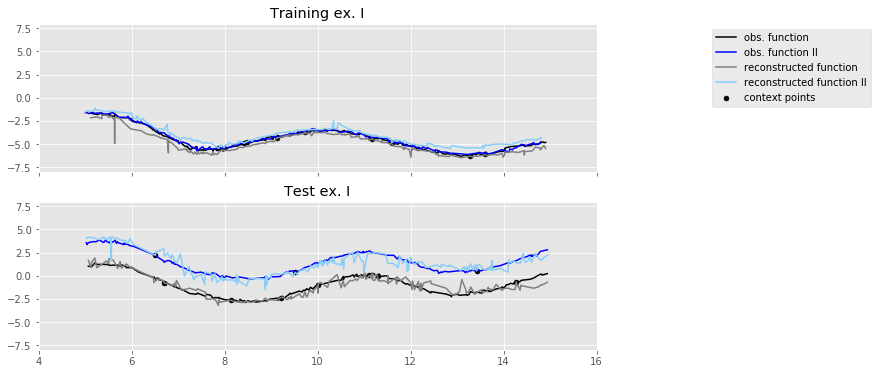

Epoch 3 batch 900 train Loss 0.1143 test Loss 0.0593 with training MSE metric 0.3565 and testing MSE metric 0.2797
learning rate is 0.0003000000142492354
r squared training, series 0: 0.6986685069189917, series 1: 0.7448502627254587
r squared testing, series 0: 0.7911173893692625, series 1: 0.8011727139712903


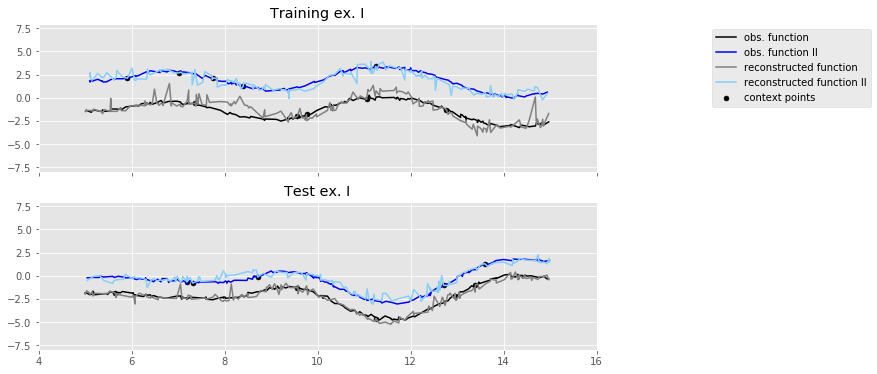

Epoch 3 batch 1200 train Loss 0.0037 test Loss 0.0227 with training MSE metric 0.2134 and testing MSE metric 0.2208
learning rate is 0.0003000000142492354
r squared training, series 0: 0.829454405833287, series 1: 0.8212261547651996
r squared testing, series 0: 0.8464793756018014, series 1: 0.8414831536325837


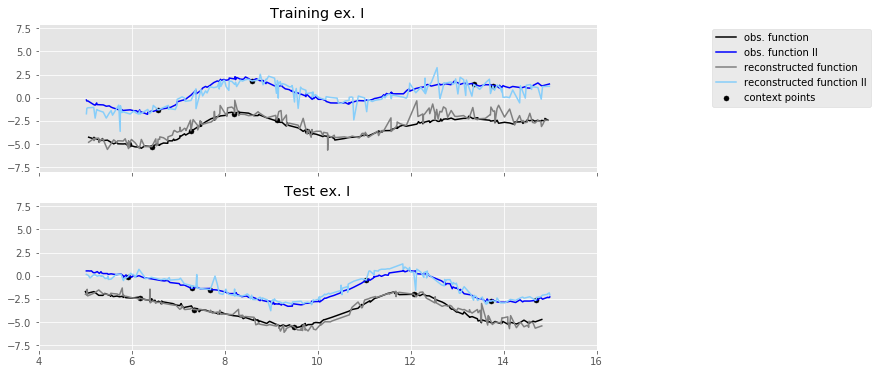

Epoch 3 batch 1500 train Loss 0.0814 test Loss 0.0719 with training MSE metric 0.2959 and testing MSE metric 0.2964
learning rate is 0.0003000000142492354
r squared training, series 0: 0.783570845590271, series 1: 0.7861861631296917
r squared testing, series 0: 0.7740909272833889, series 1: 0.7667773789108809


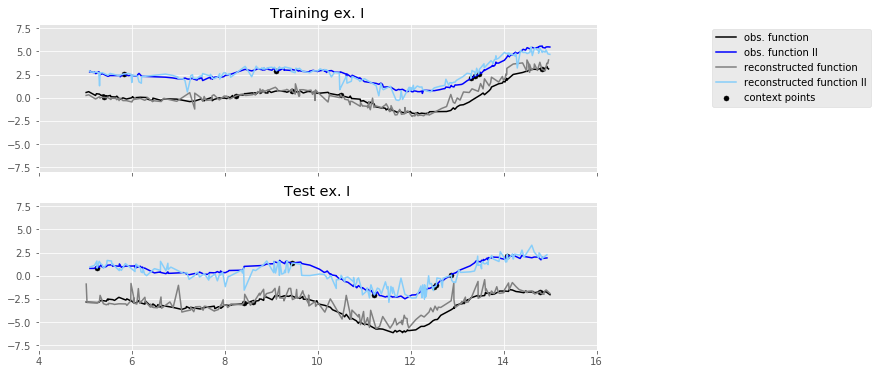

Epoch 3 batch 1800 train Loss -0.0160 test Loss 0.0766 with training MSE metric 0.2203 and testing MSE metric 0.3091
learning rate is 0.0003000000142492354
r squared training, series 0: 0.8218280729829034, series 1: 0.8321622145900897
r squared testing, series 0: 0.7817017805317472, series 1: 0.7756221181771271
Time taken for 1 epoch: 6242.447623968124 secs



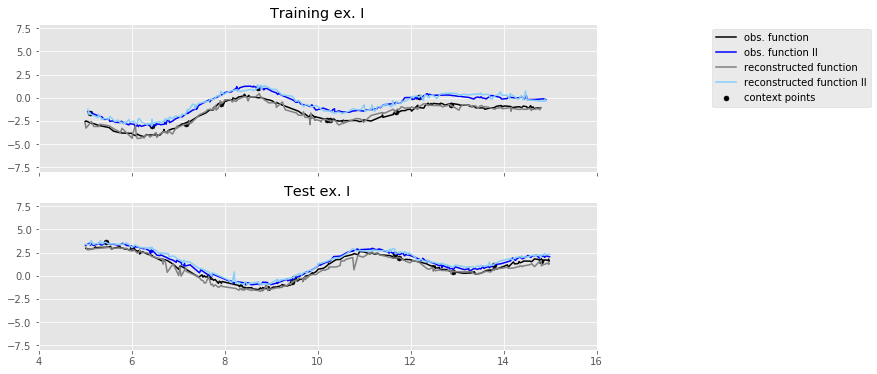

Epoch 4 batch 0 train Loss 0.0177 test Loss 0.0598 with training MSE metric 0.2623 and testing MSE metric 0.3208
learning rate is 0.0003000000142492354
r squared training, series 0: 0.819190329581371, series 1: 0.8034921062735034
r squared testing, series 0: 0.7454843132328155, series 1: 0.7781233509282957


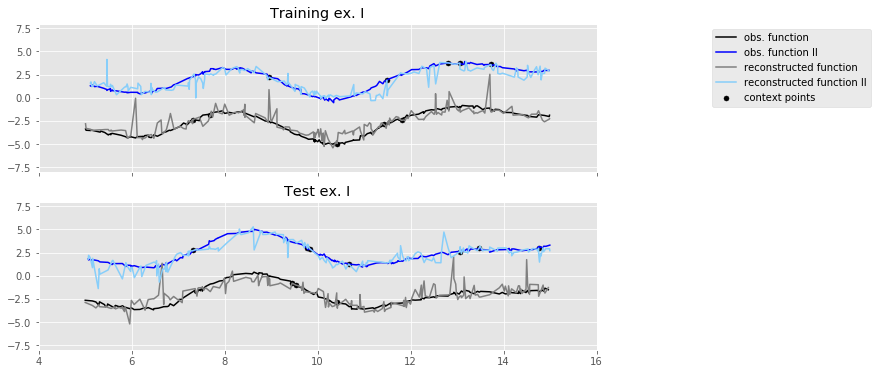

Epoch 4 batch 300 train Loss 0.0595 test Loss 0.0833 with training MSE metric 0.3012 and testing MSE metric 0.3403
learning rate is 0.0003000000142492354
r squared training, series 0: 0.792740571821389, series 1: 0.7746439176505703
r squared testing, series 0: 0.7655880219025317, series 1: 0.7325901757323485


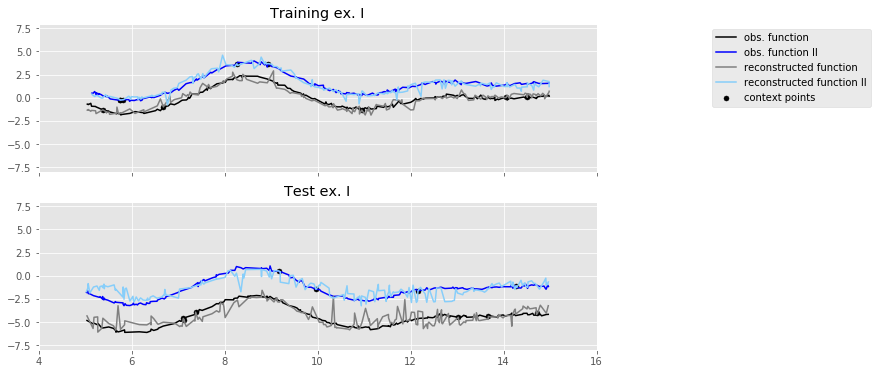

Epoch 4 batch 600 train Loss 0.0933 test Loss 0.1478 with training MSE metric 0.3403 and testing MSE metric 0.4126
learning rate is 0.0003000000142492354
r squared training, series 0: 0.764267749513001, series 1: 0.7354271691379206
r squared testing, series 0: 0.698728050094521, series 1: 0.67014258485704


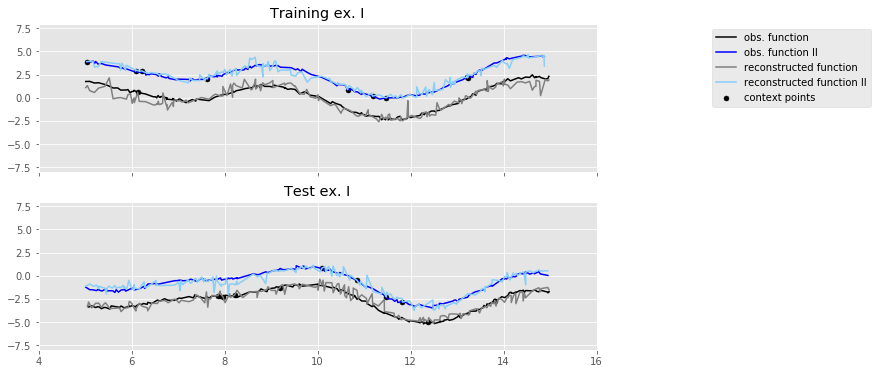

Epoch 4 batch 900 train Loss 0.0311 test Loss 0.0643 with training MSE metric 0.2338 and testing MSE metric 0.2896
learning rate is 0.0003000000142492354
r squared training, series 0: 0.8175864733654574, series 1: 0.8347959892408923
r squared testing, series 0: 0.7787927921472868, series 1: 0.7886048354308628


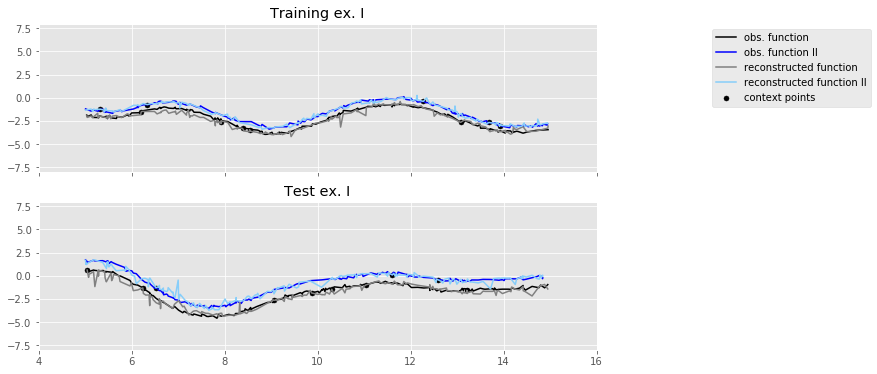

Epoch 4 batch 1200 train Loss 0.0315 test Loss 0.0285 with training MSE metric 0.2790 and testing MSE metric 0.2510
learning rate is 0.0003000000142492354
r squared training, series 0: 0.7912822150685632, series 1: 0.7707773037026076
r squared testing, series 0: 0.8273537925213672, series 1: 0.8153048447121647


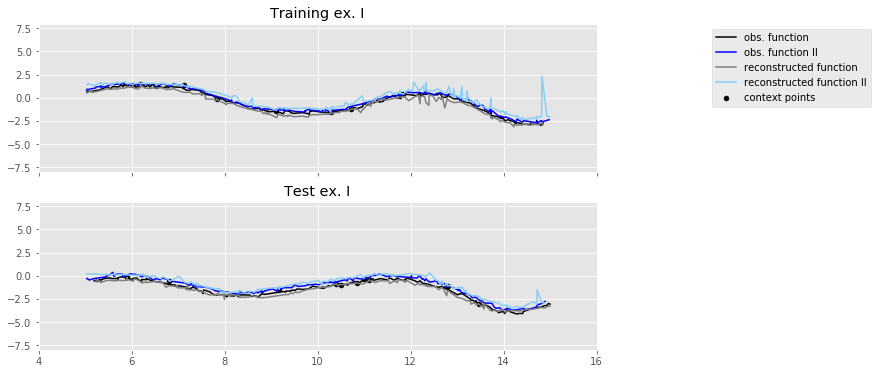

Epoch 4 batch 1500 train Loss 0.0090 test Loss 0.1157 with training MSE metric 0.2570 and testing MSE metric 0.3850
learning rate is 0.0003000000142492354
r squared training, series 0: 0.8127386791896042, series 1: 0.8242655237081373
r squared testing, series 0: 0.7039215644183321, series 1: 0.6743623094940285


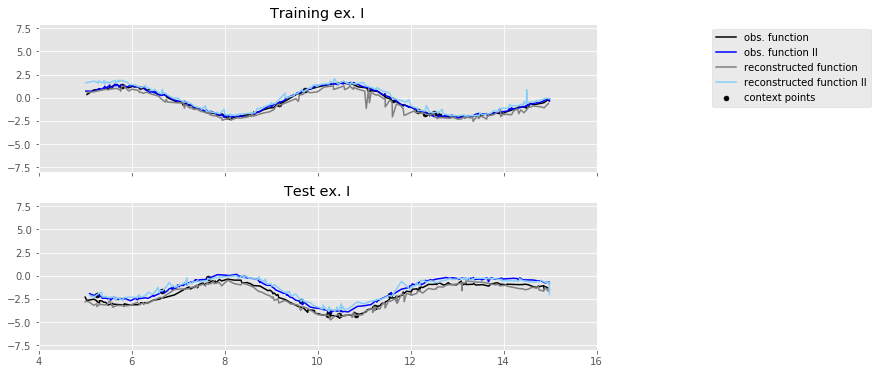

Epoch 4 batch 1800 train Loss 0.0086 test Loss 0.0118 with training MSE metric 0.2403 and testing MSE metric 0.2347
learning rate is 0.0003000000142492354
r squared training, series 0: 0.81139849747909, series 1: 0.8066334686087322
r squared testing, series 0: 0.8411075015187576, series 1: 0.8254452113244247
Time taken for 1 epoch: 6090.721143007278 secs



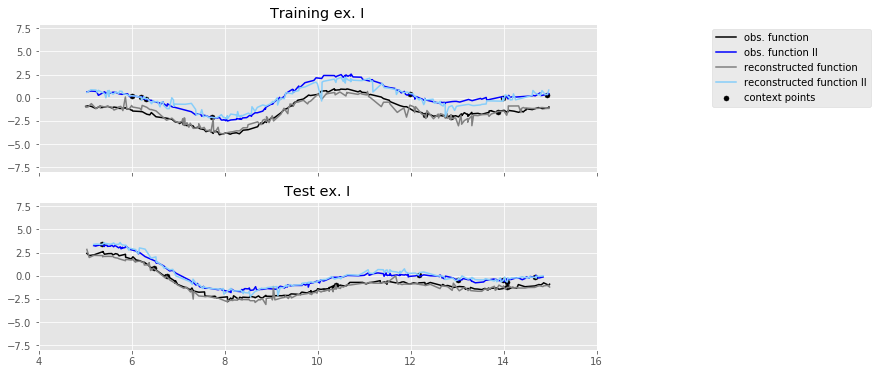

Epoch 5 batch 0 train Loss 0.0751 test Loss -0.0053 with training MSE metric 0.2986 and testing MSE metric 0.2127
learning rate is 0.0003000000142492354
r squared training, series 0: 0.7690873296120966, series 1: 0.7744440142366797
r squared testing, series 0: 0.8360409553210161, series 1: 0.8433026518529144


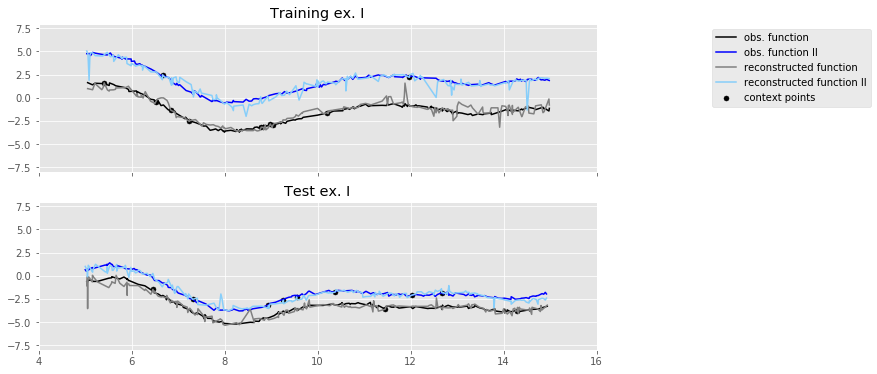

Epoch 5 batch 300 train Loss 0.0614 test Loss 0.0440 with training MSE metric 0.3088 and testing MSE metric 0.2948
learning rate is 0.0003000000142492354
r squared training, series 0: 0.772303603644645, series 1: 0.7683683343050685
r squared testing, series 0: 0.7819650181032856, series 1: 0.7712943993404856


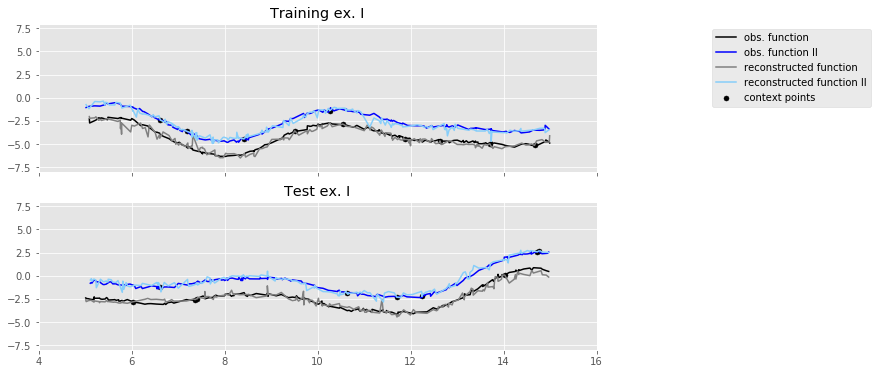

Epoch 5 batch 600 train Loss 0.0267 test Loss 0.0089 with training MSE metric 0.2717 and testing MSE metric 0.2383
learning rate is 0.0003000000142492354
r squared training, series 0: 0.8141767812082397, series 1: 0.8031533832984926
r squared testing, series 0: 0.8180576365333754, series 1: 0.8126301451404532


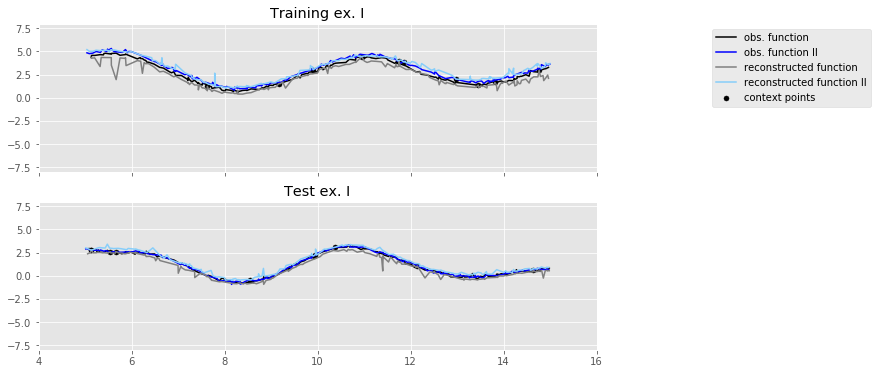

Epoch 5 batch 900 train Loss 0.0297 test Loss -0.0190 with training MSE metric 0.2783 and testing MSE metric 0.2278
learning rate is 0.0003000000142492354
r squared training, series 0: 0.7805451157975702, series 1: 0.7775964375348026
r squared testing, series 0: 0.8232259813763423, series 1: 0.8388180603412998


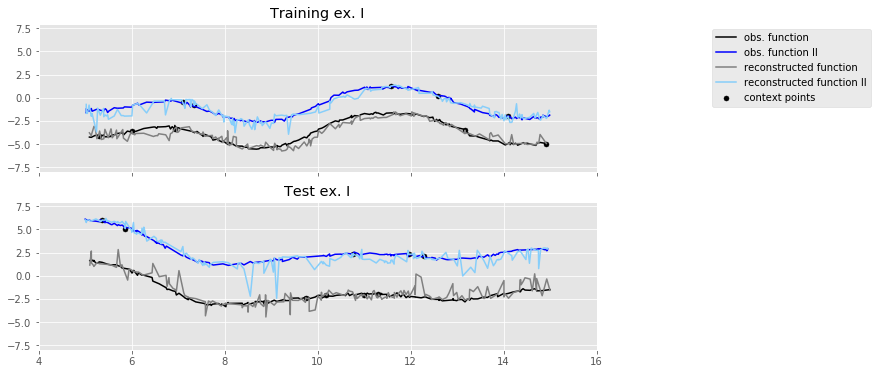

Epoch 5 batch 1200 train Loss 0.0438 test Loss 0.0548 with training MSE metric 0.2877 and testing MSE metric 0.3103
learning rate is 0.0003000000142492354
r squared training, series 0: 0.7744484979739719, series 1: 0.7733986585017593
r squared testing, series 0: 0.767068951910127, series 1: 0.7349285812911608


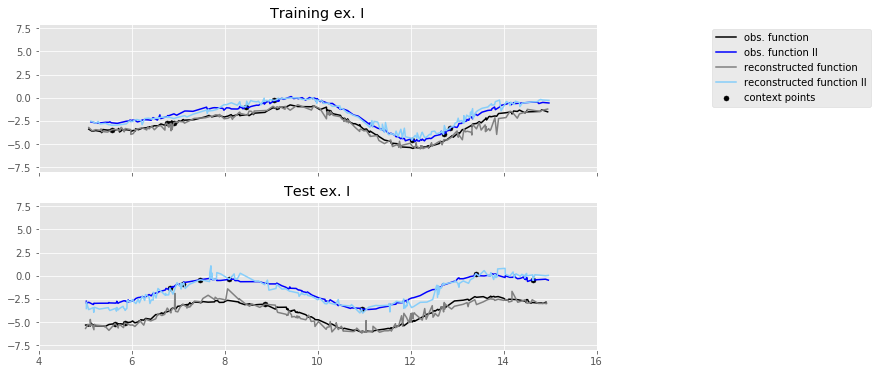

Epoch 5 batch 1500 train Loss 0.0067 test Loss -0.0372 with training MSE metric 0.2551 and testing MSE metric 0.1976
learning rate is 0.0003000000142492354
r squared training, series 0: 0.7925727823053598, series 1: 0.8172014218285666
r squared testing, series 0: 0.8635157204711899, series 1: 0.8411956629413541


KeyboardInterrupt: 

In [16]:
if __name__ == '__main__':
    EPOCHS = 75; batch_s  = 64; run = 9999; step = 0; train_steps = 35000; heads = 8; ℯ = 256; context = 10
    l1, _, l2, l3 = [256, 256, 64, 32]
    name_comp = 'run_' + str(run) 
    logdir = save_dir + '/logs/' + name_comp
    writer = tf.summary.create_file_writer(logdir)
    folder = save_dir + '/ckpt/check_' + name_comp
#     lr_fn = tf.optimizers.schedules.PolynomialDecay(9e-3, train_steps, 1e-7, 2)
    optimizer_c = tf.keras.optimizers.Adam(3e-4)
#     ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context,  d = d)
    helpers.mkdir(folder)
    if d:
        decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
    else:
        decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
    tf.random.set_seed(443)  
    num_batches = int(data[5].shape[0] / batch_s) if d else int(data[4].shape[0] / batch_s)
    ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
    manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
    ckpt.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("Restored from {}".format(manager.latest_checkpoint))
    else:
        print("Initializing from scratch.")
#     optimizer_c = tf.keras.optimizers.Adam(3e-4)
    with writer.as_default():
        for epoch in range(EPOCHS):
            
            start = time.time()

            for batch_n in range(num_batches):
                m_tr.reset_states(); train_loss.reset_states()
                if d:
                    b_data = batch_creator.create_batch(em_x = data[-4], x = data[1], y = data[-3],  em_2 = data[-1], batch_s=64, d=d)
#                     b_data, c = batch_creator.create_batch_2d(em_x = data[-4], x = data[1], y = data[-3],  em_2 = data[-1], batch_s=64)
# #                     print('c: ', c)
#                     if type(c) is list:
#                         cols = [np.arange(c[i], b_data[2].shape[1] -1, 1) for i in range(len(c))]
#                         cc = np.concatenate(cols, axis=0 )
#                         rows = [np.repeat(i, len(m)) for i, m in enumerate(cols)]
#                         r = np.concatenate(rows, axis=0)
#                         to_gather = np.concatenate((r.reshape(-1, 1), cc.reshape(-1,1)), 1)
#                     else:
#                         to_gather = None
#                     pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, b_data[2], b_data[0], d = True, x2 = b_data[3], to_gather=to_gather, context_p = c)
                    pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, b_data[2], b_data[0], d = True, x2 = b_data[3], to_gather=None, context_p = context)
                else:
                    b_data = batch_creator.create_batch(em_x = data[3], x = data[0], y = data[4], batch_s=64, d=d)
                    pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, x = b_data[2], y = b_data[0], context_p = context)
                if (epoch == 0) & (batch_n == 0): helpers.write_speci(folder, names, shapes, context)
                if batch_n % 300 == 0:
                    m_te.reset_states(); test_loss.reset_states()
                    if d:
                        b_data_te = batch_creator.create_batch(em_x = data[3], x = data[2], y = data[6],  em_2 = data[0], batch_s=64, d=d)


#                         b_data_te, c_te = batch_creator.create_batch_2d(em_x = data[3], x = data[2], y = data[6],  em_2 =  data[0], batch_s=64)
#                         if type(c_te) is list:
#                             cols = [np.arange(c_te[i], b_data_te[2].shape[1] -1, 1) for i in range(len(c_te))]
#                             cc = np.concatenate(cols, axis=0 )
#                             rows = [np.repeat(i, len(m)) for i, m in enumerate(cols)]
#                             r = np.concatenate(rows, axis=0)
#                             to_gather_te = np.concatenate((r.reshape(-1, 1), cc.reshape(-1,1)), 1)
#                         else:
#                             to_gather_te = None
                        
                        
#                         pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = b_data_te[2], y_te = b_data_te[0], x2_te = b_data_te[3], to_gather=to_gather_te, context_p = context, d=True)
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, b_data_te[2], b_data_te[0], d = True, x2_te = b_data_te[3], to_gather=None, context_p = context)


                        
#                         idd = np.random.choice(np.arange(0, 64))
#                         seq_l = to_gather[to_gather[:, 0] == idd][0, 1]
#                         plt.scatter(b_data[1][idd, :seq_l], b_data[0][idd, :seq_l] , c = 'blue')
#                         plt.scatter(b_data[1][idd, seq_l:], pred[idd][(seq_l - 1):])
# #                         plt.savefig('foo{}.png'.format((batch_n / num_batches) + (epoch + 1))
#                         plt.show()
                        
                        plotter.follow_training_plot2d(x_tr = b_data[1], y_tr = b_data[0], em_2_tr = b_data[3] , pred = pred, x_te = b_data_te[1], y_te = b_data_te[0], em_2_te = b_data_te[3] ,pred_te = pred_te, num_context = context)
                    else:
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = data[2][:500, :], y_te = data[5][:500, :], context_p = context)
                        plotter.follow_training_plot(x_tr = b_data[1], y_tr = b_data[0], pred = pred, x_te = data[1][:500, :], y_te = data[5][:500, :], pred_te = pred_te, num_context = context)
                    helpers.print_progress(epoch, batch_n, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result())
                    helpers.tf_summaries(run, step, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result(), weights, names)
                    print('learning rate is {}'.format(optimizer_c._decayed_lr('float32').numpy()))
                    if d:
                        m0, m1 = metrics.r_sq_2d(b_data[0][:, 1:], pred.numpy(), b_data[3][:, 1:], context_p = context)
                        m0_te, m1_te = metrics.r_sq_2d(b_data_te[0][:, 1:], pred_te.numpy(), b_data_te[3][:, 1:], context_p = context)
                        print('r squared training, series 0: {}, series 1: {}'.format(m0, m1))
                        print('r squared testing, series 0: {}, series 1: {}'.format(m0_te, m1_te))

#                     else: 
#                         print('r squared training: ', metrics.r_squared(m_tr.result(), b_data[0][:, (context + 1):]))
#                         print('r squared testing: ', metrics.r_squared(m_te.result(), data[5][:500, (context + 1):], batch_s = 500))


                    manager.save()
                step += 1
                ckpt.step.assign_add(1)

            print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

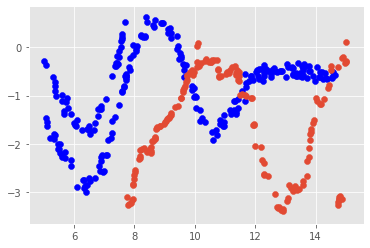

In [8]:
plt.scatter(b_data[1][idd, :seq_l], b_data[0][idd, :seq_l] , c = 'blue')
plt.scatter(b_data[1][idd, seq_l:], pred[idd][(seq_l - 1):])

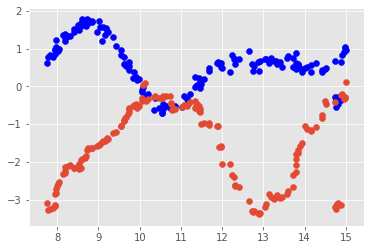

In [9]:
plt.scatter(b_data[1][idd, seq_l:], b_data[0][idd, seq_l:] , c = 'blue')
plt.scatter(b_data[1][idd, seq_l:], pred[idd][(seq_l - 1):])

In [17]:
from tensorboard.plugins import projector
# Save the weights we want to analyse as a variable. Note that the first
# value represents any unknown word, which is not in the metadata, so
# we will remove that value.
subwords = np.concatenate(([0, 1], np.unique(b_data[2])))
with open(os.path.join(logdir, 'metadata.tsv'), "w") as f:
    for subword in subwords:
        f.write("learnt {}\n".format(subword))
    for unknown in np.arange(0, 2000)[~np.isin(range(0, 2000), subwords)]:
        f.write("unknown #{}\n".format(unknown))
weights = tf.Variable(decoder.layers[0].get_weights()[0])
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(logdir, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(logdir, config)

In [18]:
from inference import infer

In [19]:
from helpers import masks

In [22]:
decoder.layers

current step:  209
current_position to infer:  5.463298473368371
current target:  -1.1987013502122066
series:  [0.]
current:  [245.]
pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.0593957

pred:  tf.Tensor(
[[-0.91373091 -0.77453935]
 [-1.20332787 -0.88627885]
 [-4.36710231 -0.81228636]
 [-0.85548727 -0.21771272]
 [-0.97679468 -0.53598321]
 [-2.91986527 -0.53174691]
 [-3.37766629 -0.34433542]
 [-1.15773809 -0.77177691]
 [-1.0983772  -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968347 -0.33230445]
 [-3.75623638 -0.19955835]
 [-1.28603149 -0.66762338]
 [-1.29049353 -0.61149338]
 [-3.64579989 -0.35795778]
 [-3.85548972 -0.19792901]
 [-4.0258262  -0.12508122]
 [-4.19369688 -0.08396106]
 [-1.42901376 -0.66054945]
 [-4.18363328 -0.11841328]
 [-4.3185535  -0.27196306]
 [-4.56584111 -0.30898953]
 [-4.5683028  -0.20355117]
 [-4.648721   -0.17387521]
 [-4.76353534 -0.16079911]
 [-4.80872928 -0.13759129]
 [-4.94585079 -0.30577912]
 [-4.29582807 -0.75386227]
 [-4.28110728 -0.80832768]
 [-4.01205272 -0.96333548]
 [-4.06115505 -0.68531941]
 [-4.05939579 -0.56775389]
 [-4.07572651 -0.56146648]
 [-4.10352736 -0.51671468]
 [-4.1089797  -0.46784817]
 [-4.07903658 -0.42936077]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373091 -0.77453935]
 [-1.20332787 -0.88627885]
 [-4.36710231 -0.81228636]
 [-0.85548727 -0.21771272]
 [-0.97679468 -0.53598321]
 [-2.91986527 -0.53174691]
 [-3.37766629 -0.34433542]
 [-1.15773809 -0.77177691]
 [-1.0983772  -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968347 -0.33230445]
 [-3.75623638 -0.19955835]
 [-1.28603149 -0.66762338]
 [-1.29049353 -0.61149338]
 [-3.64579989 -0.35795778]
 [-3.85548972 -0.19792901]
 [-4.0258262  -0.12508122]
 [-4.19369688 -0.08396106]
 [-1.42901376 -0.66054945]
 [-4.18363328 -0.11841328]
 [-4.3185535  -0.27196306]
 [-4.56584111 -0.30898953]
 [-4.5683028  -0.20355117]
 [-4.648721   -0.17387521]
 [-4.76353534 -0.16079911]
 [-4.80872928 -0.13759129]
 [-4.94585079 -0.30577912]
 [-4.29582807 -0.75386227]
 [-4.28110728 -0.80832768]
 [-4.01205272 -0.96333548]
 [-4.06115505 -0.68531941]
 [-4.05939579 -0.56775389]
 [-4.07572651 -0.56146648]
 [-4.10352736 -0.51671468]
 [-4.1089797  -0.46784817]
 [-4.07903658 -0.42936077]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373091 -0.77453935]
 [-1.20332787 -0.88627885]
 [-4.36710231 -0.81228636]
 [-0.85548727 -0.21771272]
 [-0.97679468 -0.53598321]
 [-2.91986527 -0.53174691]
 [-3.37766629 -0.34433542]
 [-1.15773809 -0.77177691]
 [-1.0983772  -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968347 -0.33230445]
 [-3.75623638 -0.19955835]
 [-1.28603149 -0.66762338]
 [-1.29049353 -0.61149338]
 [-3.64579989 -0.35795778]
 [-3.85548972 -0.19792901]
 [-4.0258262  -0.12508122]
 [-4.19369688 -0.08396106]
 [-1.42901376 -0.66054945]
 [-4.18363328 -0.11841328]
 [-4.3185535  -0.27196306]
 [-4.56584111 -0.30898953]
 [-4.5683028  -0.20355117]
 [-4.648721   -0.17387521]
 [-4.76353534 -0.16079911]
 [-4.80872928 -0.13759129]
 [-4.94585079 -0.30577912]
 [-4.29582807 -0.75386227]
 [-4.28110728 -0.80832768]
 [-4.01205272 -0.96333548]
 [-4.06115505 -0.68531941]
 [-4.05939579 -0.56775389]
 [-4.07572651 -0.56146648]
 [-4.10352736 -0.51671468]
 [-4.1089797  -0.46784817]
 [-4.07903658 -0.42936077]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373091 -0.77453935]
 [-1.20332787 -0.88627885]
 [-4.36710231 -0.81228636]
 [-0.85548727 -0.21771272]
 [-0.97679468 -0.53598321]
 [-2.91986527 -0.53174691]
 [-3.37766629 -0.34433542]
 [-1.15773809 -0.77177691]
 [-1.0983772  -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968347 -0.33230445]
 [-3.75623638 -0.19955835]
 [-1.28603149 -0.66762338]
 [-1.29049353 -0.61149338]
 [-3.64579989 -0.35795778]
 [-3.85548972 -0.19792901]
 [-4.0258262  -0.12508122]
 [-4.19369688 -0.08396106]
 [-1.42901376 -0.66054945]
 [-4.18363328 -0.11841328]
 [-4.3185535  -0.27196306]
 [-4.56584111 -0.30898953]
 [-4.5683028  -0.20355117]
 [-4.648721   -0.17387521]
 [-4.76353534 -0.16079911]
 [-4.80872928 -0.13759129]
 [-4.94585079 -0.30577912]
 [-4.29582807 -0.75386227]
 [-4.28110728 -0.80832768]
 [-4.01205272 -0.96333548]
 [-4.06115505 -0.68531941]
 [-4.05939579 -0.56775389]
 [-4.07572651 -0.56146648]
 [-4.10352736 -0.51671468]
 [-4.1089797  -0.46784817]
 [-4.07903658 -0.42936077]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373091 -0.77453935]
 [-1.20332787 -0.88627885]
 [-4.36710231 -0.81228636]
 [-0.85548727 -0.21771272]
 [-0.97679468 -0.53598321]
 [-2.91986527 -0.53174691]
 [-3.37766629 -0.34433542]
 [-1.15773809 -0.77177691]
 [-1.0983772  -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968347 -0.33230445]
 [-3.75623638 -0.19955835]
 [-1.28603149 -0.66762338]
 [-1.29049353 -0.61149338]
 [-3.64579989 -0.35795778]
 [-3.85548972 -0.19792901]
 [-4.0258262  -0.12508122]
 [-4.19369688 -0.08396106]
 [-1.42901376 -0.66054945]
 [-4.18363328 -0.11841328]
 [-4.3185535  -0.27196306]
 [-4.56584111 -0.30898953]
 [-4.5683028  -0.20355117]
 [-4.648721   -0.17387521]
 [-4.76353534 -0.16079911]
 [-4.80872928 -0.13759129]
 [-4.94585079 -0.30577912]
 [-4.29582807 -0.75386227]
 [-4.28110728 -0.80832768]
 [-4.01205272 -0.96333548]
 [-4.06115505 -0.68531941]
 [-4.05939579 -0.56775389]
 [-4.07572651 -0.56146648]
 [-4.10352736 -0.51671468]
 [-4.1089797  -0.46784817]
 [-4.07903658 -0.42936077]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373091 -0.77453935]
 [-1.20332787 -0.88627885]
 [-4.36710231 -0.81228636]
 [-0.85548727 -0.21771272]
 [-0.97679468 -0.53598321]
 [-2.91986527 -0.53174691]
 [-3.37766629 -0.34433542]
 [-1.15773809 -0.77177691]
 [-1.0983772  -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968347 -0.33230445]
 [-3.75623638 -0.19955835]
 [-1.28603149 -0.66762338]
 [-1.29049353 -0.61149338]
 [-3.64579989 -0.35795778]
 [-3.85548972 -0.19792901]
 [-4.0258262  -0.12508122]
 [-4.19369688 -0.08396106]
 [-1.42901376 -0.66054945]
 [-4.18363328 -0.11841328]
 [-4.3185535  -0.27196306]
 [-4.56584111 -0.30898953]
 [-4.5683028  -0.20355117]
 [-4.648721   -0.17387521]
 [-4.76353534 -0.16079911]
 [-4.80872928 -0.13759129]
 [-4.94585079 -0.30577912]
 [-4.29582807 -0.75386227]
 [-4.28110728 -0.80832768]
 [-4.01205272 -0.96333548]
 [-4.06115505 -0.68531941]
 [-4.05939579 -0.56775389]
 [-4.07572651 -0.56146648]
 [-4.10352736 -0.51671468]
 [-4.1089797  -0.46784817]
 [-4.07903658 -0.42936077]
 [-3.96834

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

 [-7.19571538e-01 -8.37888477e-01]], shape=(276, 2), dtype=float64)
sample_y:  -0.6926755329062907
current step:  277
current_position to infer:  9.155136225547203
current target:  1.7499855679609149
series:  [0.]
current:  [282.]
pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+0

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

 [-2.77552765e+00 -7.68680810e-01]], shape=(324, 2), dtype=float64)
sample_y:  -3.786562568057761
current step:  325
current_position to infer:  11.590272044177045
current target:  0.1783339133684243
series:  [0.]
current:  [306.]
pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+0

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

 [-2.33546347e+00 -5.96443608e-01]], shape=(343, 2), dtype=float64)
sample_y:  -1.835401515361112
current step:  344
current_position to infer:  12.296957659375426
current target:  0.054275519887793916
series:  [0.]
current:  [313.]
pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

pred:  tf.Tensor(
[[-9.13730914e-01 -7.74539351e-01]
 [-1.20332787e+00 -8.86278854e-01]
 [-4.36710231e+00 -8.12286356e-01]
 [-8.55487269e-01 -2.17712723e-01]
 [-9.76794680e-01 -5.35983208e-01]
 [-2.91986527e+00 -5.31746910e-01]
 [-3.37766629e+00 -3.44335416e-01]
 [-1.15773809e+00 -7.71776915e-01]
 [-1.09837720e+00 -7.63819054e-01]
 [-3.50735251e+00 -4.27125131e-01]
 [-3.63968347e+00 -3.32304455e-01]
 [-3.75623638e+00 -1.99558351e-01]
 [-1.28603149e+00 -6.67623382e-01]
 [-1.29049353e+00 -6.11493381e-01]
 [-3.64579989e+00 -3.57957776e-01]
 [-3.85548972e+00 -1.97929008e-01]
 [-4.02582620e+00 -1.25081216e-01]
 [-4.19369688e+00 -8.39610551e-02]
 [-1.42901376e+00 -6.60549449e-01]
 [-4.18363328e+00 -1.18413281e-01]
 [-4.31855350e+00 -2.71963062e-01]
 [-4.56584111e+00 -3.08989529e-01]
 [-4.56830280e+00 -2.03551172e-01]
 [-4.64872100e+00 -1.73875210e-01]
 [-4.76353534e+00 -1.60799106e-01]
 [-4.80872928e+00 -1.37591293e-01]
 [-4.94585079e+00 -3.05779119e-01]
 [-4.29582807e+00 -7.53862269e-01]
 [

 [-1.60493564 -0.58782965]], shape=(210, 2), dtype=float64)
sample_y:  tf.Tensor(-1.6049356388981264, shape=(), dtype=float64)
current step:  211
series:  [0.]
current:  [246.]
pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

 [-1.94497019 -0.46391661]], shape=(227, 2), dtype=float64)
sample_y:  tf.Tensor(-1.9449701877916534, shape=(), dtype=float64)
current step:  228
series:  [0.]
current:  [258.]
pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

 [-0.45841788 -0.96822251]], shape=(250, 2), dtype=float64)
sample_y:  tf.Tensor(-0.45841787876724627, shape=(), dtype=float64)
current step:  251
series:  [0.]
current:  [271.]
pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.9633

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

 [-0.95894243 -0.84023909]], shape=(273, 2), dtype=float64)
sample_y:  tf.Tensor(-0.9589424328775635, shape=(), dtype=float64)
current step:  274
series:  [0.]
current:  [281.]
pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

 [-1.6876822  -0.85003853]], shape=(288, 2), dtype=float64)
sample_y:  tf.Tensor(-1.687682203515321, shape=(), dtype=float64)
current step:  289
series:  [0.]
current:  [290.]
pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.963335

 [-2.00950428 -0.9494364 ]], shape=(295, 2), dtype=float64)
sample_y:  tf.Tensor(-2.0095042800268175, shape=(), dtype=float64)
current step:  296
series:  [0.]
current:  [294.]
pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

pred:  tf.Tensor(
[[-0.91373087 -0.77453935]
 [-1.20332784 -0.88627886]
 [-4.36710231 -0.81228636]
 [-0.85548724 -0.21771272]
 [-0.97679465 -0.53598321]
 [-2.9198653  -0.53174689]
 [-3.37766629 -0.3443354 ]
 [-1.15773806 -0.77177691]
 [-1.09837717 -0.76381905]
 [-3.50735251 -0.42712513]
 [-3.63968348 -0.33230447]
 [-3.75623635 -0.19955835]
 [-1.28603146 -0.66762338]
 [-1.29049349 -0.61149338]
 [-3.64579986 -0.35795779]
 [-3.85548969 -0.19792902]
 [-4.0258262  -0.1250812 ]
 [-4.19369687 -0.08396104]
 [-1.42901372 -0.66054945]
 [-4.18363326 -0.11841327]
 [-4.3185534  -0.27196295]
 [-4.56584104 -0.3089895 ]
 [-4.56830289 -0.20355125]
 [-4.64872105 -0.17387525]
 [-4.76353538 -0.16079913]
 [-4.80872931 -0.13759131]
 [-4.94585079 -0.30577915]
 [-4.29582817 -0.7538622 ]
 [-4.28110736 -0.80832765]
 [-4.01205279 -0.96333548]
 [-4.06115504 -0.68531947]
 [-4.05939579 -0.56775392]
 [-4.07572657 -0.56146647]
 [-4.10352744 -0.51671467]
 [-4.10897975 -0.46784817]
 [-4.07903663 -0.42936075]
 [-3.96834

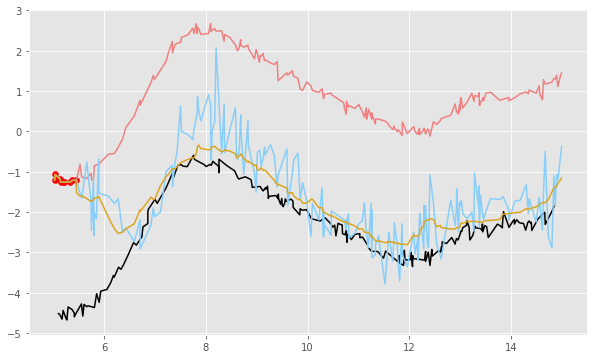

In [25]:
# for i in range(10):
idx = int(np.random.choice(np.arange(0, 30000, 1), 1))
xx, yy, no_s_x1, no_s_y1, x_infer, em, s_y_inf,  n_s_x0_p, n_s_y0_p, n_s_x0, n_s_y0 = plotter.infer_plot2D(decoder, x = data[2][idx, :], y = data[6][idx, :], em = data[3][idx, :], em_2 = data[0][idx, :], samples = 1, num_steps = 999, consec = True, order = True, context_p = 10)

In [10]:
np.array([[1, 2, 3, 4] , [1, 5, 1, 6]]).shape

(2, 4)

In [26]:
tf.reshape(tf.repeat(b_data[0], 256), [64, 400, 256])

<tf.Tensor: shape=(64, 400, 256), dtype=float64, numpy=
array([[[-4.13754431, -4.13754431, -4.13754431, ..., -4.13754431,
         -4.13754431, -4.13754431],
        [-0.60447276, -0.60447276, -0.60447276, ..., -0.60447276,
         -0.60447276, -0.60447276],
        [ 2.56426865,  2.56426865,  2.56426865, ...,  2.56426865,
          2.56426865,  2.56426865],
        ...,
        [-3.30969762, -3.30969762, -3.30969762, ..., -3.30969762,
         -3.30969762, -3.30969762],
        [ 2.48086764,  2.48086764,  2.48086764, ...,  2.48086764,
          2.48086764,  2.48086764],
        [-3.41158581, -3.41158581, -3.41158581, ..., -3.41158581,
         -3.41158581, -3.41158581]],

       [[ 1.69094657,  1.69094657,  1.69094657, ...,  1.69094657,
          1.69094657,  1.69094657],
        [-0.33770907, -0.33770907, -0.33770907, ..., -0.33770907,
         -0.33770907, -0.33770907],
        [ 1.09868354,  1.09868354,  1.09868354, ...,  1.09868354,
          1.09868354,  1.09868354],
        ...

In [14]:
a = tf.tile(b_data[0])

In [15]:
a.numpy().reshape(2, -1)

array([[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 5, 1, 6, 1, 5, 1, 6, 1, 5,
        1, 6],
       [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 5, 1, 6, 1, 5, 1, 6, 1, 5,
        1, 6]])

In [11]:
import glob
from PIL import Image

# filepaths
fp_in = image_folder = '/Users/omernivron/Downloads/attention_plots/*.png'
fp_out = "/Users/omernivron/Downloads/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=700, loop=0)

